In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Part 1 Data Acquisition

df = pd.read_csv('UsedCar_MissingValue.csv')

print(df.head(10))

# Display the variable list
print(df.columns.values)

# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

     Price   Age       KM Fuel_Type     HP Metallic Automatic      CC  Doors  \
0  13500.0  23.0  46986.0    Diesel   90.0      Yes         N  2000.0    3.0   
1  13750.0  23.0  72937.0    Diesel   90.0      Yes         N  2000.0    3.0   
2  13950.0  24.0  41711.0    Diesel   90.0      Yes         N  2000.0    3.0   
3  14950.0   NaN      NaN       NaN    NaN      NaN       NaN     NaN    NaN   
4  13750.0  30.0  38500.0    Diesel   90.0       No         N  2000.0    3.0   
5  12950.0  32.0  61000.0    Diesel   90.0       No         N  2000.0    3.0   
6  16900.0  27.0  94612.0    Diesel   90.0      Yes         N  2000.0    3.0   
7  18600.0  30.0  75889.0    Diesel   90.0      Yes         N  2000.0    3.0   
8  21500.0  27.0  19700.0    Petrol  192.0       No         N  1800.0    3.0   
9  12950.0  23.0  71138.0    Diesel   69.0       No         N  1900.0    3.0   

   Quarterly_Tax  Weight  
0          210.0  1165.0  
1          210.0  1165.0  
2          210.0  1165.0  
3          

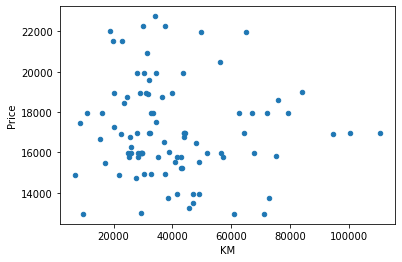

In [4]:
# Part2 Data Exploration

# Placeholder variables: x_var, y_var. 
x_var = 'KM'
y_var = 'Price'

# Draw the scatterplot
df.plot.scatter(x=x_var, y=y_var, legend=False)

                  Price       Age        KM        HP        CC     Doors  \
Price          1.000000 -0.106704 -0.068429  0.637656  0.135741  0.051753   
Age           -0.106704  1.000000 -0.077147  0.241590 -0.029227  0.223002   
KM            -0.068429 -0.077147  1.000000 -0.183834 -0.032651  0.023027   
HP             0.637656  0.241590 -0.183834  1.000000  0.024144 -0.109083   
CC             0.135741 -0.029227 -0.032651  0.024144  1.000000  0.094328   
Doors          0.051753  0.223002  0.023027 -0.109083  0.094328  1.000000   
Quarterly_Tax  0.180809 -0.276595  0.592243 -0.228946  0.100368 -0.067540   
Weight         0.579760 -0.154935  0.396187  0.248563  0.192225 -0.047267   

               Quarterly_Tax    Weight  
Price               0.180809  0.579760  
Age                -0.276595 -0.154935  
KM                  0.592243  0.396187  
HP                 -0.228946  0.248563  
CC                  0.100368  0.192225  
Doors              -0.067540 -0.047267  
Quarterly_Tax      

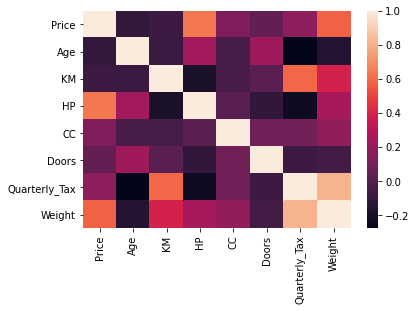

In [5]:
# Draw a heat map for all the numerical variables in the data frame
df4heatmaps = df

# Compute the correlation matrix 
corr = df4heatmaps.corr()
print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Text(0, 0.5, 'Price')

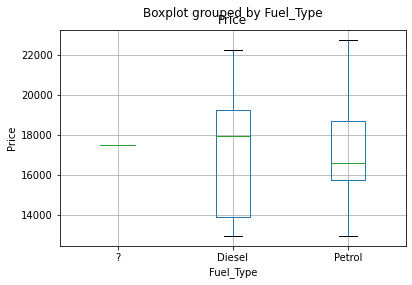

In [6]:
# Draw a side-by-side box plot to detect if a categorical variable is correlated with a numerical variable
x_var = 'Fuel_Type'
y_var = 'Price'
df4ssb = df

# Generate ax (side-by-side boxplot object)
ax = df4ssb.boxplot(column=y_var, by=x_var)

ax.set_ylabel(y_var)

In [7]:
# Part 3 Missing Value Imputation

df.isnull().sum()

#Try drop all the observations that contains missing values
print(df.dropna())

# Drop the observations that contain missing dependent variable values
DV = 'Price'
df_sample1 = df.dropna(subset=[DV])

# Separate all the variables into two lists for future column indexing. One for numerical, the other for categorical 
cvar_list = ['Fuel_Type', 'Metallic', 'Automatic', 'Doors']
nvar_list = ['Price', 'Age', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight']

# Impute numerical missing values using sample median
df_sample2 = df_sample1.copy()
df_sample2[nvar_list] = df_sample1[nvar_list].fillna(value=df_sample1[nvar_list].median())

# Get the unique values of each categorical variables in the data frame
def column_unique_values(x_column):
  return list(x_column.unique())

df_sample2[cvar_list].apply(column_unique_values)

# Replace the irregular values with the null values which represent missing values 
irregular_var = 'Fuel_Type'
irregular_value = '?'

df_sample3 = df_sample2.copy()
df_sample3[irregular_var] = df_sample2[irregular_var].replace(irregular_value, np.nan)

# Impute the categorical missing values using sample mode
df_sample4 = df_sample3.copy()
df_sample4[cvar_list] = df_sample3[cvar_list].fillna(value=df_sample3[cvar_list].mode().loc[0,:])

# Check if there is any missing value left
df_sample4.isnull().sum()

      Price   Age       KM Fuel_Type     HP Metallic Automatic      CC  Doors  \
0   13500.0  23.0  46986.0    Diesel   90.0      Yes         N  2000.0    3.0   
1   13750.0  23.0  72937.0    Diesel   90.0      Yes         N  2000.0    3.0   
2   13950.0  24.0  41711.0    Diesel   90.0      Yes         N  2000.0    3.0   
4   13750.0  30.0  38500.0    Diesel   90.0       No         N  2000.0    3.0   
5   12950.0  32.0  61000.0    Diesel   90.0       No         N  2000.0    3.0   
..      ...   ...      ...       ...    ...      ...       ...     ...    ...   
95  19950.0  17.0  30351.0    Diesel   90.0      Yes         N  1995.0    3.0   
96  15950.0  19.0  29435.0    Petrol   97.0      Yes         N  1400.0    3.0   
97  15950.0  19.0  25948.0    Petrol   97.0      Yes         N  1400.0    3.0   
98  18750.0  11.0  24500.0    Petrol  110.0      Yes         N  1600.0    3.0   
99  16950.0  29.0  43905.0    Petrol  110.0       No         Y  1600.0    3.0   

    Quarterly_Tax  Weight  

Price            0
Age              0
KM               0
Fuel_Type        0
HP               0
Metallic         0
Automatic        0
CC               0
Doors            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
# Part 4 Variable transformation

# Standardize the numerical variables 
df_sample5 = df_sample4.copy()
df_sample5[nvar_list] = (df_sample4[nvar_list] - df_sample4[nvar_list].mean())/df_sample4[nvar_list].std()

df_sample6 = df_sample5.copy()
df_sample6[cvar_list] = df_sample5[cvar_list].astype('category')
df_sample6[nvar_list] = df_sample5[nvar_list].astype('float64')

# Convert the categorical variables into dummies 
df_sample7 = df_sample6.copy()
df_sample7 = pd.get_dummies(df_sample6, prefix_sep='_')

# Remove the redundant dummies 
rdummies = ['Fuel_Type_Petrol', 'Metallic_No', 'Automatic_N', 'Doors_5.0']
df_sample8 = df_sample7.copy()
df_sample8 = df_sample7.drop(columns=rdummies)

print(df_sample8.columns.values)

print(df_sample8)
print(df)

['Price' 'Age' 'KM' 'HP' 'CC' 'Quarterly_Tax' 'Weight' 'Fuel_Type_Diesel'
 'Metallic_Yes' 'Automatic_Y' 'Doors_3.0']
       Price       Age        KM        HP        CC  Quarterly_Tax    Weight  \
0  -1.512692 -0.689998  0.341034 -0.689308  0.144829       1.678618  0.451786   
1  -1.408163 -0.689998  1.644866 -0.689308  0.144829       1.678618  0.451786   
2  -1.324540 -0.443025  0.076007 -0.689308  0.144829       1.678618  0.451786   
3  -0.906424  0.297896 -0.284027 -0.437944 -0.126481      -0.499597 -0.432540   
4  -1.408163  1.038816 -0.085320 -0.689308  0.144829       1.678618  0.550045   
..       ...       ...       ...       ...       ...            ...       ...   
95  1.184157 -2.171839 -0.494742 -0.689308  0.141438       2.096835  2.318697   
96 -0.488308 -1.677892 -0.540764 -0.437944 -0.262136      -0.499597 -0.825574   
97 -0.488308 -1.677892 -0.715958 -0.437944 -0.262136      -0.499597 -0.825574   
98  0.682417 -3.653680 -0.788709  0.028875 -0.126481      -0.499597 -0.43

In [9]:
# Part 5 Data Partiton

from sklearn.model_selection import train_test_split

df4partition = df_sample8
testpart_size = 0.2

# random_state specifies the seed for random number generator. Random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Price       Age        KM        HP        CC  Quarterly_Tax    Weight  \
41 -0.153815  0.297896  0.194428 -0.437944 -0.262136      -0.499597 -0.825574   
32 -0.488308  0.297896 -0.536996 -0.437944 -0.262136      -0.499597 -0.825574   
54 -0.676460 -0.196051  0.450411  0.028875 -0.126481      -0.238211  0.451786   
20 -0.488308  1.038816  1.379739  0.028875 -0.126481      -0.499597 -0.727315   
94  0.745135 -1.430919 -0.419430  0.028875 -0.126481      -0.499597 -0.432540   
..       ...       ...       ...       ...       ...            ...       ...   
77  0.556982  0.297896 -0.839504  0.028875 -0.126481      -0.499597 -0.530798   
9  -1.742656 -0.689998  1.554481 -1.443401  0.077002       1.242975 -0.727315   
74  1.184157  0.544869 -0.612862  0.028875 -0.126481      -0.499597 -0.236023   
12  1.037816 -0.196051 -0.402398  2.973427  0.009174      -0.238211  0.844820   
39 -0.990047  0.297896 -0.637983 -0.437944 -0.262136      -0.499597 -0.825574   

    Fuel_Type_Diesel  Metal

In [12]:
# Part 6 Lasso analysis

from sklearn.linear_model import Lasso, LassoCV

DV = 'Price'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Run Lasso with pre-specified penalty level (alpha)
alpha = 0.01

# The Lasso results are put into a Lasso model object clf
clf = Lasso(alpha=alpha, random_state=1).fit(X,y)

# to display the estimated coefficients of a model candidate obtained by the Lasso analysis
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

# Run Lasso with k-fold cross validation
kfolds = 5

# Set n_jobs to be -1 to run LassoCV on all CPU cores.
clf_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(clf_optimal.alpha_)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))

# Calcuate the ASE over the test partition based on the final selected model

y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
y_test_predicted = clf_optimal.predict(X_test)

# Get the number of obs in the test partition
n_obs_test = df_testData.shape[0]

# Derive ASE over the test partition based on the definition of ASE
ASE_test = sum((y_test_actual - y_test_predicted)**2)/n_obs_test

# Derive ASE over the nontest partition based on the definition of ASE
y_nontest_actual = y
y_nontest_predicted = clf_optimal.predict(X)
n_obs_nontest = df_nontestData.shape[0]

ASE_nontest = sum((y_nontest_actual - y_nontest_predicted)**2)/n_obs_nontest

# Compare the ASE over the test partition and the nontest partition.
# If the gap is big, the final selected model might overfit the historical data 
print(ASE_test)
print(ASE_nontest)


0.08728759038394253
                         0
Age              -0.045162
KM               -0.000000
HP                0.523970
CC                0.000000
Quarterly_Tax     0.000000
Weight            0.238496
Fuel_Type_Diesel -0.000000
Metallic_Yes      0.000000
Automatic_Y       0.000000
Doors_3.0        -0.000000
Intercept        -0.020254
0.5738790080326128
0.402322060828412


In [13]:
# Part7 Score the new data

df_newdata = pd.read_csv('UsedCar_NewData.csv')

npredictor_list = nvar_list.copy()
npredictor_list.remove(DV)

print(npredictor_list)

df_newdata_sample1 = df_newdata.copy()
df_newdata_sample1[cvar_list] = df_newdata[cvar_list].astype('category')
df_newdata_sample1[npredictor_list] = df_newdata[npredictor_list].astype('float64')

historical_sample_mean = df_sample4[nvar_list].mean()
historical_sample_std = df_sample4[nvar_list].std()

# Use the historical sample mean and historical sample standard deviation to standardize the new data
df_newdata_sample2 = df_newdata_sample1.copy()
df_newdata_sample2[npredictor_list] = (df_newdata_sample1[npredictor_list] - historical_sample_mean[npredictor_list])/historical_sample_std[npredictor_list]

df_newdata_sample3 = pd.get_dummies(df_newdata_sample2, prefix_sep='_')

print(df_newdata_sample3.columns.values)

# Keep the same remaining dummies in the new data as in the historical data 
rdummies_newdata = ['Metallic_No', 'Automatic_N', 'Doors_5']
df_newdata_sample4 = df_newdata_sample3.drop(columns=rdummies_newdata)

# Make the variable names of the remaining dummies be consistent between the historical data and the new data 
df_newdata_sample5 = df_newdata_sample4.rename(columns={'Doors_3':'Doors_3.0'})

# Score the new data using the model carried by the model object clf_optimal 
predicted_standardizedPrice = clf_optimal.predict(df_newdata_sample5)

print(predicted_standardizedPrice)

# Convert the standardized predicted prices back to the original predicted prices using the historical sample mean and historical sample standard deviation
predicted_Price = predicted_standardizedPrice * historical_sample_std[DV] + historical_sample_mean[DV]

print(predicted_Price)

['Age', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight']
['Age' 'KM' 'HP' 'CC' 'Quarterly_Tax' 'Weight' 'Fuel_Type_Petrol'
 'Metallic_No' 'Metallic_Yes' 'Automatic_N' 'Automatic_Y' 'Doors_3'
 'Doors_5']
[-1.02080774 -0.42750799 -0.3214907  -0.93597107 -0.46096911 -1.09888368
 -1.02080774 -1.16918628 -0.32036391 -0.85789513 -1.00965404 -0.84223427
 -1.09888368 -0.92932452 -1.00965404 -0.99850033 -0.98734662]
[14676.43085482 16095.41398434 16348.97342566 14879.33302289
 16015.38569893 14489.69818887 14676.43085482 14321.556867
 16351.66834268 15066.06568884 14703.10694996 15103.52145205
 14489.69818887 14895.22944995 14703.10694996 14729.78304509
 14756.45914023]
